### PROJECT HANDWRITTEN DIGIT RECOGNITION

### Load Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

### Prepare data

In [2]:
mnist = fetch_openml('mnist_784')

In [ ]:
# print(mnist.DESCR)

In [3]:
import sklearn
sklearn.__version__

'0.23.2'

In [4]:
X = mnist.data
Y = mnist.target

<h3>Analyze Data</h3>

In [5]:
pd.Series(Y).value_counts()

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
dtype: int64

In [6]:
print(X.shape)
print(Y.shape)

(70000, 784)
(70000,)


In [7]:
np.unique(Y)

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [8]:
idx = (Y=='0')|(Y=='2')
X_new = X[idx]
Y_new = Y[idx]

In [9]:
print(X_new.shape)
print(Y_new.shape)

(13893, 784)
(13893,)


In [10]:
np.unique(Y_new)

array(['0', '2'], dtype=object)

### Split data

In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(X_new,Y_new,test_size=.20, 
                                               random_state=10)

In [12]:
print(xtrain.shape)
print(ytrain.shape)

(11114, 784)
(11114,)


In [13]:
print(xtest.shape)
print(ytest.shape)

(2779, 784)
(2779,)


### Implement Feature Scaling
- Min Max
- Standard scaler

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [14]:
print(xtrain.min(), xtrain.max())
print(xtest.min(),xtest.max())

0.0 255.0
0.0 255.0


### Feature Scaling - Method 1

In [ ]:
# std = StandardScaler()
minmax = MinMaxScaler(feature_range=(0,1))
scaled_data_training = minmax.fit_transform(xtrain)
scaled_data_test = minmax.fit_transform(xtest)

In [ ]:
print(scaled_data_training.min())
print(scaled_data_training.max())
print(scaled_data_test.min())
print(scaled_data_test.max())

### Feature Scaling - Method 2

In [15]:
xtrain_scaled = xtrain/255
xtest_scaled = xtest/255

In [16]:
print(xtrain_scaled.max(), xtest_scaled.min())

1.0 0.0


### Feature Selection - PCA

In [17]:
from sklearn.decomposition import PCA

In [18]:
xtrain_scaled.shape

(11114, 784)

In [19]:
pca = PCA(.95)
# - By feature number 
# - By percentage

In [20]:
xtrain_selected=pca.fit_transform(xtrain_scaled)
xtrain_selected.shape

(11114, 135)

In [21]:
xtest_scaled.shape

(2779, 784)

In [22]:
xtest_selected= pca.transform(xtest_scaled)
xtest_selected.shape

(2779, 135)

### Train Model

In [23]:
lg = LogisticRegression(C=1)
lg.fit(xtrain_selected, ytrain)

LogisticRegression(C=1)

In [24]:
lg.score(xtrain_selected, ytrain)

0.9939715673924779

### Prediction

In [25]:
pred = lg.predict(xtest_selected)
pred

array(['0', '0', '0', ..., '2', '0', '2'], dtype=object)

2


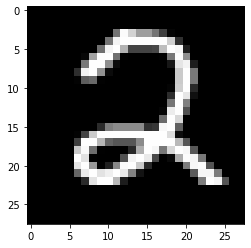

In [31]:
print(pred[100])
plt.imshow(xtest[100].reshape(28,28), cmap="gray")

### Evaluation

In [32]:
accuracy_score(ytest, pred)

0.9892047499100396

In [34]:
pd.Series(ytest).value_counts()

2    1436
0    1343
dtype: int64

In [33]:
confusion_matrix(ytest,pred)

array([[1331,   12],
       [  18, 1418]], dtype=int64)

In [40]:
for i in range(1,10):
    p=lg.predict(xtest_selected[i].reshape(1,-1))
    plt.subplot(3,3,i)
    plt.imshow(xtest[i].reshape(28,28),cmap="gray")
    plt.axis("off")
    plt.title(p[0])
   

### Prediction using Image processing

In [41]:
import cv2

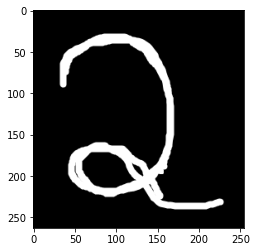

In [44]:
img=cv2.imread("test/a.png",2)
plt.imshow(img,cmap="gray")

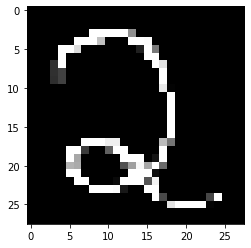

In [46]:
im1 = cv2.resize(img, (28,28))
plt.imshow(im1, cmap="gray")

In [58]:
imm=im1.reshape(1,-1)/255 #feature scaling
print(imm.shape)
final=pca.transform(imm)
print(final.shape)
print("Prediction: ",lg.predict(final)[0])

(1, 784)
(1, 135)
Prediction:  2


### Prediction on real data

In [72]:
import os
data = []

for i in os.listdir('test/'):
    img = cv2.imread('test/'+i,2)
    data.append(cv2.resize(img,(28,28)))
    print(i,"added successfully!")

00.png added successfully!
a.png added successfully!
ab.png added successfully!
t0.png added successfully!
t01.png added successfully!
t1.png added successfully!
t2.png added successfully!
t21.png added successfully!
t223.png added successfully!
t23.png added successfully!
t3.png added successfully!
test.png added successfully!


In [73]:
data[0].shape

(28, 28)

In [74]:
final = np.array(data).reshape(len(data),-1)
final.shape

(12, 784)

In [75]:
# Implement PCA and feature scaling on test data 
print(final.max())
xtest_new = final/255
print(xtest_new.max())
xtest_new = pca.transform(xtest_new)
print(xtest_new.shape)

255
1.0
(12, 135)


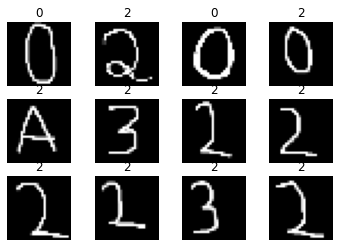

In [79]:
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(data[i], cmap="gray")
    p=lg.predict(xtest_new[i].reshape(1,-1))
    plt.title(p[0])
    plt.axis('off')